In [13]:
import pandas as pd                 
import math                         
data = pd.read_csv("/content/sales-shampoo.csv")     
print(data.head())                  

Y = data['Sales of shampoo over a three year period']           # masukkan data IPG2211A2N ke dalam Y
Y = Y.tolist()                   # memasukkan nilai 'IPG2211A2N' atau Y kedalam list
date = data['Month']              # --> deklarasi kolom DATE ke dalam date
date = date.tolist()

# Menambahkan kolom baru bernilai 1-i, karena kolom 'DATE' tidak bisa dimasukkan ke dalam perhitungan rumus karena berbentuk tanggal
data['X'] = 0 #buat kolom bernama x dengan nilai 0

X = data['X']
X.tolist()

for i in range(0, len(Y)):
    X[i] = i+1
    #print(X[i])


   Month  Sales of shampoo over a three year period
0  1-Jan                                      266.0
1  1-Feb                                      145.9
2  1-Mar                                      183.1
3  1-Apr                                      119.3
4  1-May                                      180.3


<ipython-input-13-ea14fbbb3318>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = i+1


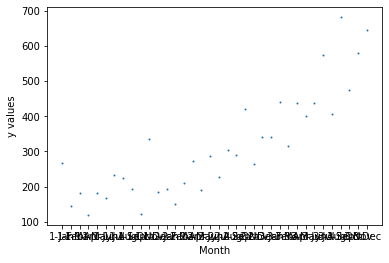

In [11]:
import matplotlib.pyplot as plt
plt.scatter(date, Y, s = 1)  
#plt.grid()              
plt.xlabel("Month")              
plt.ylabel("y values")              
plt.show()                          

In [14]:
def gradient_descent(X, Y, w, b, alpha):
 
    dl_dw = 0.0                  
    dl_db = 0.0                  
    N = len(X)               

    for i in range(N):            
        dl_dw += -1*X[i] * (Y[i] - (w*X[i] + b))  
        dl_db += -1*(Y[i] - (w*X[i] + b))     

    w = w - (1/float(N)) * dl_dw * alpha      
    b = b - (1/float(N)) * dl_db * alpha      

    return w, b

from decimal import Decimal
def cost_function (X, Y, w, b):

    N = len(X)                    
    total_error = 0.0             
    total_error = Decimal(total_error)
    for i in range(N):           
        total_error += Decimal(Y[i] - (w*X[i] - b))**2   # mengubah float ke decimal karena nilai dibelakangan koma terlalu banyak prev--> total_error += Decimal(Y[i] - (w*X[i] - b))**2
        
    return total_error / Decimal(2*float(N))  # menambahkan fungsi float prev->  return total_error / (2*float(N)) 

def train(X, Y, w, b, alpha, n_iter):

    for i in range(n_iter):                        
        w, b = gradient_descent(X, Y, w, b, alpha) 

        if i % 800 == 0:                           
            print ("iteration:", i, "cost: ", cost_function(X, Y, w, b)) 
    return w, b                                   

def predict(x, w, b):                             
    return x*w + b
                            

In [109]:
w, b = train(X, Y, 100.0, 100.0, 0.0001, 89)

x_new = 50.0
y_new = predict(x_new, w, b)
print("\n\nUji prediksi dengan satu data\n\nnilai y jika x = 50", y_new) 

# data_test = pd.read_csv("/content/Electric_Production.csv")                 
# x_test = data_test['x']                 # load data test yang sudah dipisah           
# y_test = data_test['y']
x_test = X[:100]
y_test = Y[:100]
y_prediction = list()  
n = len(x_test)                                     
for i in range(n):                                  
  y_new = predict(x_test[i], w, b)                  
  y_prediction.append(y_new)                        

print("\n\nnilai x, nilai test y, nilai prediksi y")                  
for i in range(n):
  #if i%30 == 0:         # pembatas mencetak hanya kelipatan 30                            
    print(x_test[i],"     ", y_test[i], "     ", y_prediction[i]) 



iteration: 0 cost:  1313331.096085133314329734187


Uji prediksi dengan satu data

nilai y jika x = 50 758.1501951119895


nilai x, nilai test y, nilai prediksi y
1       266.0       109.65164768255134
2       145.9       122.88631191580518
3       183.1       136.12097614905903
4       119.3       149.35564038231286
5       180.3       162.5903046155667
6       168.5       175.82496884882056
7       231.8       189.0596330820744
8       224.5       202.29429731532824
9       192.8       215.52896154858206
10       122.9       228.7636257818359
11       336.5       241.99829001508976
12       185.9       255.23295424834362
13       194.3       268.46761848159747
14       149.5       281.7022827148513
15       210.1       294.9369469481051
16       273.3       308.17161118135897
17       191.4       321.4062754146128
18       287.0       334.6409396478666
19       226.0       347.87560388112047
20       303.6       361.1102681143743
21       289.9       374.3449323476282
22       421.6 

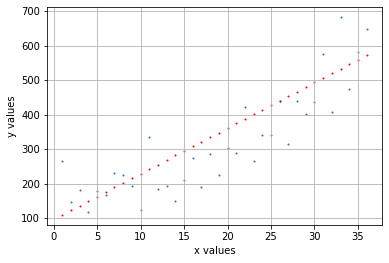

In [110]:
plt.scatter(x_test, y_test, s = 1)                      
plt.scatter(x_test, y_prediction, c="Red", s = 1, zorder=1)
plt.grid()                          
plt.xlabel("x values")              
plt.ylabel("y values")              
plt.show()                          

In [111]:
for i in range(len(y_test)):
  error = (y_test[i] - abs(y_prediction[i]))**2

mse = error / len(y_test)

print("Mean squared error (MSE): ", mse)
print("Root mean squared error (RMSE) :", math.sqrt(mse))

Mean squared error (MSE):  152.25546241747517
Root mean squared error (RMSE) : 12.339184025594042
